In [1]:
#!pip install opencv-python

In [2]:
import cv2

In [3]:
import numpy as np
import os
print(os.getcwd())

/Users/syshin/Desktop/Himedia/Himedia_Jupyter/data22(tensorflow)


In [4]:
data_dir = os.chdir(os.getcwd() + '/img-animal')

In [5]:
## 이미지 파일 리스트 4000개 읽어봐서, 각각의 이미지파일마다 타겟 설정

In [6]:
import glob

In [7]:
data_list = glob.glob('*.jpg')
data_list[:5]

['dog.1753.jpg', 'cat.1211.jpg', 'dog.775.jpg', 'cat.1577.jpg', 'cat.952.jpg']

In [8]:
len(data_list), type(data_list)

(4000, list)

In [9]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [10]:
#string을 특정한 기준에 의해 token으로 끊어 리스트를 리턴
token = text_to_word_sequence(data_list[0])
token, type(token)

(['dog', '1753', 'jpg'], list)

In [11]:
token[0]

'dog'

In [12]:
label = []

In [13]:
for x in data_list[:100]:
    token = text_to_word_sequence(x)
    label.append(token[0])
len(label), label[:5]

(100, ['dog', 'cat', 'dog', 'cat', 'cat'])

In [14]:
label2 = []


In [15]:
for x in data_list:
    token = text_to_word_sequence(x)
    label2.append(token[0])
len(label2), label2[:5]

(4000, ['dog', 'cat', 'dog', 'cat', 'cat'])

In [16]:
## 라벨인코더: 카테고리형 문자를 숫자로 자동 변환해주는 역할
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([1, 0, 1, 0, 0])

In [18]:
import cv2
import matplotlib.pyplot as plt

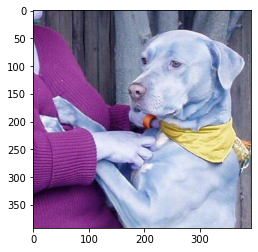

In [19]:
img = cv2.imread(data_list[0])
plt.imshow(img)

In [20]:
img.shape

(392, 393, 3)

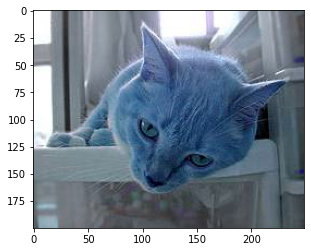

In [21]:
img1 = cv2.imread(data_list[1])
plt.imshow(img1)

In [22]:
img1.shape

(200, 249, 3)

In [23]:
## 표준화
image1 = img1/255
image1[0][0]

array([1., 1., 1.])

In [24]:
## 크기를 동일하게 변경

In [25]:
data_height = 150
data_width = 150
channel_n = 3

In [26]:
image2 = cv2.resize(image1, (data_height, data_width))
image2.shape

(150, 150, 3)

In [27]:
## 4000개의 크기를 다 변경해주세요
img_list = []
## 255로 표준화시켜주고, 크기변경하고 나서의 결과를 모아주기 위한 리스트
for x in data_list:
    images = cv2.resize(cv2.imread(x)/255, (data_height, data_width))
    img_list.append(images)
len(img_list), img_list[0].shape

(4000, (150, 150, 3))

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist, fashion_mnist

In [29]:
## CNN 특성 추출을 하려면 이미지가 4차원이 되어야 한다.!
## (4000, 150, 150, 3)
## 4000: 이미지의 개수
## 150, 150: 가로세로 픽셀
## 3: 칼라
## 0으로 채워지는 4차원 배열을 하나 만들어두었다가
## 이미지 하나하나를 스케일링하고 리사이징해서
## 4차원에 하나씩 넣자.!

In [30]:
total_images = np.zeros((5, data_height, data_width, channel_n))
total_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [31]:
data_list_len = len(data_list)
data_list_len

4000

In [32]:
## 읽어온 이미지 목록을 넣으면 라벨링/이미지 스케일링/리사이징해서
## 우리가 원하는 이미지 데이터를 만들자
def make_file(data_list, data_height, data_width, channel_n, data_list_len):
    ## 라벨링한 결과 넣어줄 1차원 리스트
    label = []
    ## 4차원으로 만들어줄 4차원 리스트
    images = np.zeros((data_list_len, data_height, data_width, channel_n))
    
    ## 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징
    for i, image in enumerate(data_list):
        try:
            ##라벨링
            token = text_to_word_sequence(image)
            label.append(token[0])

            ## 이미지 읽고, 스케일링, 리사이징
            image_read = cv2.imread(image)
            image_resized = cv2.resize(image_read, (data_height, data_width)) / 255
            images[i, :, :, :] = image_resized
        except Exception as e:
            print(str(e))
            
    label = np.array(label)
    return (label, images)

In [33]:
image_read = cv2.imread(data_list[0])
image_read

array([[[234, 219, 251],
        [233, 218, 250],
        [230, 217, 249],
        ...,
        [ 66,  70,  94],
        [ 78,  82, 106],
        [ 71,  75,  99]],

       [[234, 219, 251],
        [231, 218, 250],
        [230, 217, 249],
        ...,
        [ 69,  73,  97],
        [ 80,  84, 108],
        [ 75,  79, 103]],

       [[231, 219, 249],
        [230, 218, 248],
        [229, 217, 247],
        ...,
        [ 71,  76,  97],
        [ 83,  88, 109],
        [ 79,  84, 105]],

       ...,

       [[141,  52, 145],
        [139,  51, 141],
        [137,  49, 139],
        ...,
        [138, 135, 151],
        [142, 139, 155],
        [135, 132, 148]],

       [[142,  53, 146],
        [139,  51, 141],
        [135,  47, 137],
        ...,
        [138, 135, 151],
        [144, 141, 157],
        [136, 133, 149]],

       [[141,  52, 145],
        [138,  50, 140],
        [135,  47, 137],
        ...,
        [142, 139, 155],
        [151, 148, 164],
        [135, 132, 148]]

In [34]:
labels, images = make_file(data_list, data_height, data_width, channel_n, data_list_len)

In [35]:
labels

array(['dog', 'cat', 'dog', ..., 'cat', 'cat', 'dog'], dtype='<U3')

In [36]:
labels.shape

(4000,)

In [37]:
images.shape

(4000, 150, 150, 3)

In [38]:
items = labels
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([1, 0, 1, ..., 0, 0, 1]), 4000)

In [39]:
label.shape

(4000,)

In [40]:
from sklearn.model_selection import train_test_split
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(3200, 150, 150, 3) (800, 150, 150, 3)


In [41]:
## 딥러닝 모델을 만들어보자.
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential

In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))


## 딥러닝 학습 레이어를 쌓아준다
## 입력-히든-출력 순서대로 쌓아준다

## 입력 1개 - 1차원
model.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체

## 히든
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(rate=0.5))

## 출력 1개 -- 딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함
## 회귀 분류인 경우(1, activation = linear)
## 2진 분류인 경우(1, activation = sigmoid)
## 다중 분류인 경우(n, activation = softmax)
model.add(Dense(1, activation='sigmoid')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)        

2022-06-09 16:21:24.980519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-09 16:21:24.980788: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [43]:
## 모델의 설정값 지정: 
# 1. 기울기 찾는데 최적의 방법 설정(옵티마이저)
# 2. 특정한 가중치를 가지는 경우 오차를 계산하는 방법 설정(loss)
# 회귀인 경우: mae
# 분류인 경우: 이진(binary_crossentropy)
#           다중(sparse_categorical_crossentropy)
# 3. fit 시킬 때 fit 시키는 상황이 순서대로 프린트되는데 출력되는 항목 설정(metrics)
model.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy']
          )

In [44]:
## 공부를 시키자!!
## epoch마다 train의 loss, acc뿐만 아니라,
## test의 loss, acc을 알고 싶으면 
## fit(validation_data = (X_test, y_test))
## 조기종료(ㄷㅁ기ㅛㄴ새ㅔㅔㅑㅜㅎ):
## epoch를 실행할 때 최적의 acc인 경우, 더 이상 epoch를 수행하지 않아도 되게
## 모델 저장(checkPoint):
## 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정
## 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백함수)
## 1)객체를 만들어주고, 2)fit(callbacks=[객체])
es = EarlyStopping(patience=5, restore_best_weights=True)
cp = ModelCheckpoint('best_cnn_1.h5')
cnn_history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es,cp],
    verbose=2
)

Epoch 1/10


2022-06-09 16:21:26.608703: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-09 16:21:26.868451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-09 16:21:30.958473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 - 5s - loss: 0.9343 - accuracy: 0.5016 - val_loss: 0.6930 - val_accuracy: 0.5062 - 5s/epoch - 194ms/step
Epoch 2/10
25/25 - 3s - loss: 0.6917 - accuracy: 0.5316 - val_loss: 0.6871 - val_accuracy: 0.6050 - 3s/epoch - 137ms/step
Epoch 3/10
25/25 - 3s - loss: 0.6878 - accuracy: 0.5491 - val_loss: 0.6797 - val_accuracy: 0.6150 - 3s/epoch - 138ms/step
Epoch 4/10
25/25 - 3s - loss: 0.6832 - accuracy: 0.5566 - val_loss: 0.6779 - val_accuracy: 0.6175 - 3s/epoch - 135ms/step
Epoch 5/10
25/25 - 3s - loss: 0.6713 - accuracy: 0.5825 - val_loss: 0.6582 - val_accuracy: 0.6425 - 3s/epoch - 135ms/step
Epoch 6/10
25/25 - 3s - loss: 0.6637 - accuracy: 0.5972 - val_loss: 0.6551 - val_accuracy: 0.6725 - 3s/epoch - 137ms/step
Epoch 7/10
25/25 - 3s - loss: 0.6445 - accuracy: 0.6425 - val_loss: 0.6424 - val_accuracy: 0.6575 - 3s/epoch - 138ms/step
Epoch 8/10
25/25 - 3s - loss: 0.6313 - accuracy: 0.6516 - val_loss: 0.6382 - val_accuracy: 0.6637 - 3s/epoch - 137ms/step
Epoch 9/10
25/25 - 3s - loss: 0.611

In [45]:
es = EarlyStopping(patience=3, restore_best_weights=True)
cp = ModelCheckpoint('best_cnn_1.h5')
cnn_history_2 = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es,cp],
    verbose=2
)

Epoch 1/10
25/25 - 4s - loss: 0.5582 - accuracy: 0.7253 - val_loss: 0.6032 - val_accuracy: 0.6887 - 4s/epoch - 161ms/step
Epoch 2/10
25/25 - 4s - loss: 0.5197 - accuracy: 0.7500 - val_loss: 0.5900 - val_accuracy: 0.6937 - 4s/epoch - 144ms/step
Epoch 3/10
25/25 - 3s - loss: 0.5009 - accuracy: 0.7725 - val_loss: 0.5940 - val_accuracy: 0.6987 - 3s/epoch - 134ms/step
Epoch 4/10
25/25 - 3s - loss: 0.4582 - accuracy: 0.8047 - val_loss: 0.5792 - val_accuracy: 0.7063 - 3s/epoch - 139ms/step
Epoch 5/10
25/25 - 4s - loss: 0.4336 - accuracy: 0.8131 - val_loss: 0.5916 - val_accuracy: 0.7125 - 4s/epoch - 141ms/step
Epoch 6/10
25/25 - 3s - loss: 0.3978 - accuracy: 0.8269 - val_loss: 0.6269 - val_accuracy: 0.7125 - 3s/epoch - 135ms/step
Epoch 7/10
25/25 - 3s - loss: 0.3529 - accuracy: 0.8512 - val_loss: 0.6563 - val_accuracy: 0.6812 - 3s/epoch - 135ms/step


In [46]:
es = EarlyStopping(patience=3, restore_best_weights=True)
cp = ModelCheckpoint('best_cnn_1.h5')
cnn_history_3 = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es,cp],
    verbose=2
)

Epoch 1/10
25/25 - 4s - loss: 0.4078 - accuracy: 0.8297 - val_loss: 0.5865 - val_accuracy: 0.7138 - 4s/epoch - 177ms/step
Epoch 2/10
25/25 - 4s - loss: 0.4040 - accuracy: 0.8316 - val_loss: 0.5933 - val_accuracy: 0.7237 - 4s/epoch - 143ms/step
Epoch 3/10
25/25 - 4s - loss: 0.3714 - accuracy: 0.8425 - val_loss: 0.6505 - val_accuracy: 0.6937 - 4s/epoch - 141ms/step
Epoch 4/10
25/25 - 3s - loss: 0.3320 - accuracy: 0.8691 - val_loss: 0.6080 - val_accuracy: 0.7188 - 3s/epoch - 137ms/step


In [47]:
es = EarlyStopping(patience=5, restore_best_weights=True)
cp = ModelCheckpoint('best_cnn_1.h5')
cnn_history_4 = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es,cp],
    verbose=2
)

Epoch 1/10
25/25 - 5s - loss: 0.3908 - accuracy: 0.8316 - val_loss: 0.6321 - val_accuracy: 0.6950 - 5s/epoch - 181ms/step
Epoch 2/10
25/25 - 4s - loss: 0.3716 - accuracy: 0.8553 - val_loss: 0.6599 - val_accuracy: 0.7100 - 4s/epoch - 158ms/step
Epoch 3/10
25/25 - 3s - loss: 0.3255 - accuracy: 0.8769 - val_loss: 0.7206 - val_accuracy: 0.7000 - 3s/epoch - 134ms/step
Epoch 4/10
25/25 - 3s - loss: 0.3088 - accuracy: 0.8734 - val_loss: 0.7301 - val_accuracy: 0.6925 - 3s/epoch - 140ms/step
Epoch 5/10
25/25 - 4s - loss: 0.2856 - accuracy: 0.8906 - val_loss: 0.7759 - val_accuracy: 0.7000 - 4s/epoch - 141ms/step
Epoch 6/10
25/25 - 4s - loss: 0.2597 - accuracy: 0.8978 - val_loss: 0.8388 - val_accuracy: 0.6912 - 4s/epoch - 147ms/step


In [48]:
test_result = model.evaluate(X_test,y_test)
test_result

25/25 [==============================] - 1s 34ms/step - loss: 0.6321 - accuracy: 0.6950


[0.6321263909339905, 0.6949999928474426]

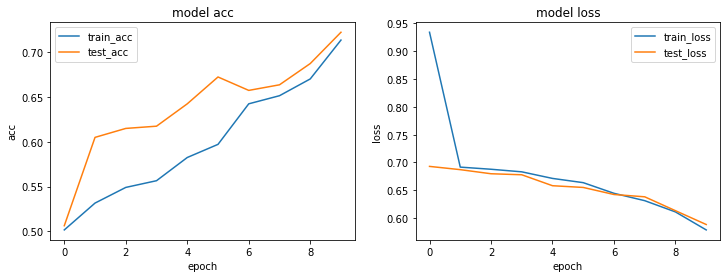

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) ## 1,행 2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])

plt.subplot(1,2,2,) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])


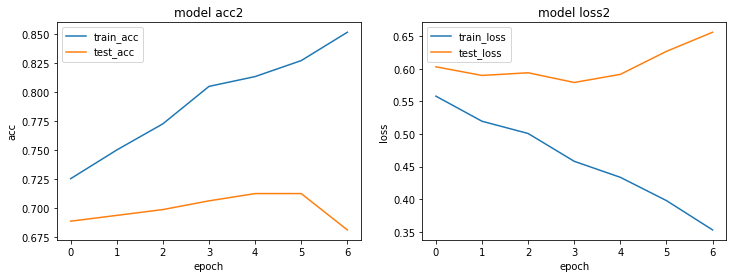

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) ## 1,행 2열의 도표, 1열
plt.plot(cnn_history_2.history['accuracy'])
plt.plot(cnn_history_2.history['val_accuracy'])
plt.title('model acc2')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])

plt.subplot(1,2,2,) ## 1행2열의 도표, 2열
plt.plot(cnn_history_2.history['loss'])
plt.plot(cnn_history_2.history['val_loss'])
plt.title('model loss2')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])


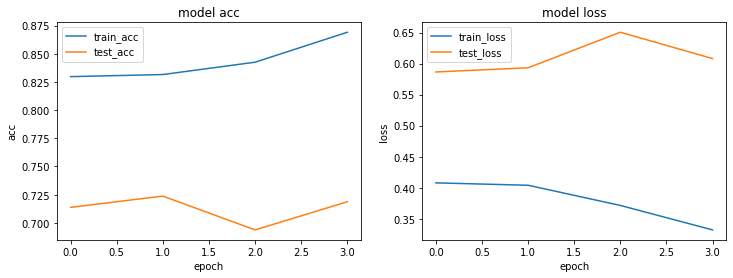

In [51]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) ## 1,행 2열의 도표, 1열
plt.plot(cnn_history_3.history['accuracy'])
plt.plot(cnn_history_3.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])

plt.subplot(1,2,2,) ## 1행2열의 도표, 2열
plt.plot(cnn_history_3.history['loss'])
plt.plot(cnn_history_3.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])


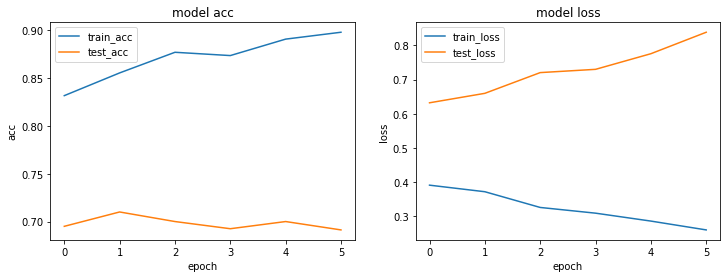

In [52]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1) ## 1,행 2열의 도표, 1열
plt.plot(cnn_history_4.history['accuracy'])
plt.plot(cnn_history_4.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])

plt.subplot(1,2,2,) ## 1행2열의 도표, 2열
plt.plot(cnn_history_4.history['loss'])
plt.plot(cnn_history_4.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])


In [53]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPool2D((2,2)))


## 딥러닝 학습 레이어를 쌓아준다
## 입력-히든-출력 순서대로 쌓아준다

## 입력 1개 - 1차원
model2.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체

## 히든
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(rate=0.7))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(rate=0.7))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(12, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(5, activation='relu'))
model2.add(Dropout(rate=0.5))

## 출력 1개 -- 딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함
## 회귀 분류인 경우(1, activation = linear)
## 2진 분류인 경우(1, activation = sigmoid)
## 다중 분류인 경우(n, activation = softmax)
model2.add(Dense(1, activation='sigmoid')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [54]:
model2.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy']
          )

In [55]:
es2 = EarlyStopping(patience=5, restore_best_weights=True)
cp2 = ModelCheckpoint('best_cnn_2.h5')
cnn_history2 = model2.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es2,cp2],
    verbose=2
)

Epoch 1/10


2022-06-09 16:23:10.961019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-09 16:23:15.532653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 - 6s - loss: 0.9630 - accuracy: 0.5181 - val_loss: 0.6932 - val_accuracy: 0.4975 - 6s/epoch - 230ms/step
Epoch 2/10
25/25 - 4s - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 149ms/step
Epoch 3/10
25/25 - 4s - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 146ms/step
Epoch 4/10
25/25 - 4s - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 149ms/step
Epoch 5/10
25/25 - 4s - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 149ms/step
Epoch 6/10
25/25 - 4s - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 152ms/step
Epoch 7/10
25/25 - 4s - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 145ms/step
Epoch 8/10
25/25 - 4s - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 144ms/step
Epoch 9/10
25/25 - 4s - loss: 0.693

In [56]:
es2 = EarlyStopping(patience=3, restore_best_weights=True)
cp2 = ModelCheckpoint('best_cnn_2.h5')
cnn_history2_2 = model2.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es2,cp2],
    verbose=2
)

Epoch 1/10


2022-06-09 16:23:51.197139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 - 5s - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4975 - 5s/epoch - 156ms/step
Epoch 2/10
32/32 - 4s - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 128ms/step
Epoch 3/10
32/32 - 4s - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 117ms/step
Epoch 4/10
32/32 - 4s - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 118ms/step
Epoch 5/10
32/32 - 4s - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4975 - 4s/epoch - 114ms/step


In [57]:
es2 = EarlyStopping(patience=3, restore_best_weights=True)
cp2 = ModelCheckpoint('best_cnn_2.h5')
cnn_history2_3 = model2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es2,cp2],
    verbose=2
)

Epoch 1/10
50/50 - 6s - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4975 - 6s/epoch - 113ms/step
Epoch 2/10
50/50 - 5s - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4975 - 5s/epoch - 96ms/step
Epoch 3/10
50/50 - 5s - loss: 0.6939 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.4975 - 5s/epoch - 91ms/step
Epoch 4/10
50/50 - 5s - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.4975 - 5s/epoch - 91ms/step
Epoch 5/10
50/50 - 5s - loss: 0.6930 - accuracy: 0.5194 - val_loss: 0.6932 - val_accuracy: 0.4975 - 5s/epoch - 91ms/step


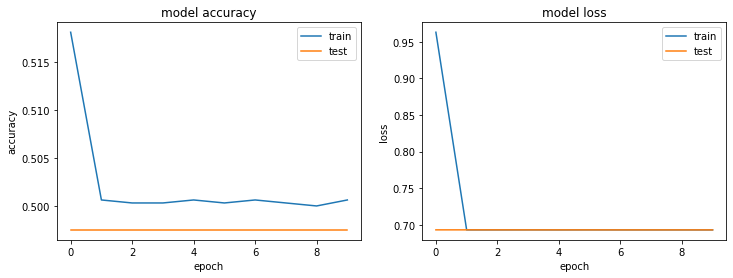

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history2.history['accuracy'])
plt.plot(cnn_history2.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history2.history['loss'])
plt.plot(cnn_history2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   

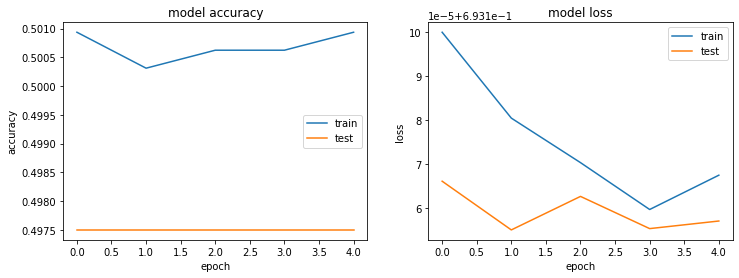

In [59]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history2_2.history['accuracy'])
plt.plot(cnn_history2_2.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history2_2.history['loss'])
plt.plot(cnn_history2_2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   

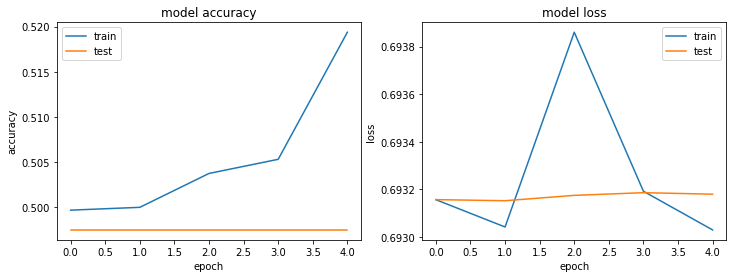

In [60]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history2_3.history['accuracy'])
plt.plot(cnn_history2_3.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history2_3.history['loss'])
plt.plot(cnn_history2_3.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   

In [61]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model3.add(MaxPool2D((2,2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPool2D((2,2)))


## 딥러닝 학습 레이어를 쌓아준다
## 입력-히든-출력 순서대로 쌓아준다

## 입력 1개 - 1차원
model3.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체

## 히든
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(5, activation='relu'))
model3.add(Dropout(rate=0.5))

## 출력 1개 -- 딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함
## 회귀 분류인 경우(1, activation = linear)
## 2진 분류인 경우(1, activation = sigmoid)
## 다중 분류인 경우(n, activation = softmax)
model3.add(Dense(1, activation='sigmoid')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [62]:
model3.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy']
          )

In [63]:
es3 = EarlyStopping(patience=5, restore_best_weights=True)
cp3 = ModelCheckpoint('best_cnn_3.h5')
cnn_history3 = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es3,cp3],
    verbose=2
)

Epoch 1/10
25/25 - 5s - loss: 0.3558 - accuracy: 0.8503 - val_loss: 0.6354 - val_accuracy: 0.7225 - 5s/epoch - 195ms/step
Epoch 2/10
25/25 - 4s - loss: 0.3362 - accuracy: 0.8647 - val_loss: 0.6690 - val_accuracy: 0.6987 - 4s/epoch - 142ms/step
Epoch 3/10
25/25 - 3s - loss: 0.2901 - accuracy: 0.8931 - val_loss: 0.7239 - val_accuracy: 0.6912 - 3s/epoch - 137ms/step
Epoch 4/10
25/25 - 3s - loss: 0.2786 - accuracy: 0.8916 - val_loss: 0.6795 - val_accuracy: 0.7163 - 3s/epoch - 138ms/step
Epoch 5/10
25/25 - 3s - loss: 0.2957 - accuracy: 0.8853 - val_loss: 0.8077 - val_accuracy: 0.6825 - 3s/epoch - 136ms/step
Epoch 6/10
25/25 - 3s - loss: 0.2653 - accuracy: 0.9034 - val_loss: 0.7891 - val_accuracy: 0.6962 - 3s/epoch - 136ms/step


In [64]:
es3 = EarlyStopping(patience=3, restore_best_weights=True)
cp3 = ModelCheckpoint('best_cnn_3.h5')
cnn_history3_2 = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es3,cp3],
    verbose=2
)

Epoch 1/10


2022-06-09 16:25:01.355210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 - 5s - loss: 0.3612 - accuracy: 0.8528 - val_loss: 0.6583 - val_accuracy: 0.6912 - 5s/epoch - 100ms/step
Epoch 2/10
50/50 - 4s - loss: 0.3325 - accuracy: 0.8600 - val_loss: 0.8215 - val_accuracy: 0.6775 - 4s/epoch - 85ms/step
Epoch 3/10
50/50 - 4s - loss: 0.2997 - accuracy: 0.8759 - val_loss: 0.8694 - val_accuracy: 0.6950 - 4s/epoch - 85ms/step
Epoch 4/10
50/50 - 4s - loss: 0.2774 - accuracy: 0.8869 - val_loss: 0.8425 - val_accuracy: 0.6925 - 4s/epoch - 85ms/step


In [65]:
es3 = EarlyStopping(patience=3, restore_best_weights=True)
cp3 = ModelCheckpoint('best_cnn_3.h5')
cnn_history3_3 = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es3,cp3],
    verbose=2
)

Epoch 1/10
13/13 - 7s - loss: 0.3290 - accuracy: 0.8628 - val_loss: 0.7329 - val_accuracy: 0.6900 - 7s/epoch - 522ms/step
Epoch 2/10
13/13 - 5s - loss: 0.3184 - accuracy: 0.8653 - val_loss: 0.7484 - val_accuracy: 0.6962 - 5s/epoch - 410ms/step
Epoch 3/10
13/13 - 5s - loss: 0.2943 - accuracy: 0.8784 - val_loss: 0.7944 - val_accuracy: 0.6962 - 5s/epoch - 400ms/step
Epoch 4/10
13/13 - 5s - loss: 0.2622 - accuracy: 0.8884 - val_loss: 0.8058 - val_accuracy: 0.7075 - 5s/epoch - 392ms/step


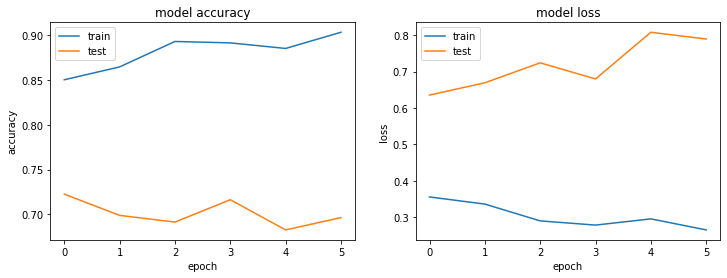

In [66]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history3.history['accuracy'])
plt.plot(cnn_history3.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history3.history['loss'])
plt.plot(cnn_history3.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   

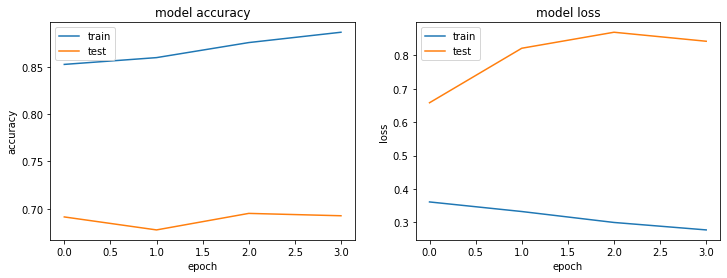

In [67]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history3_2.history['accuracy'])
plt.plot(cnn_history3_2.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history3_2.history['loss'])
plt.plot(cnn_history3_2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   

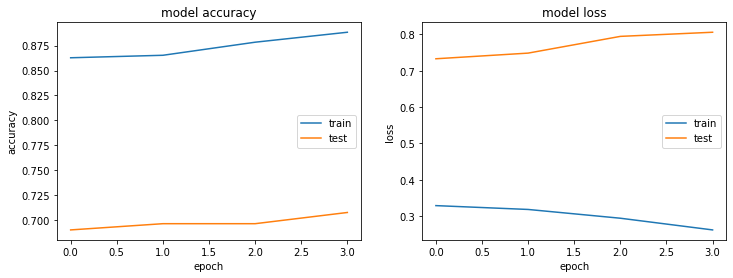

In [68]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history3_3.history['accuracy'])
plt.plot(cnn_history3_3.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history3_3.history['loss'])
plt.plot(cnn_history3_3.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   

In [69]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model4.add(MaxPool2D((2,2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPool2D((2,2)))


## 딥러닝 학습 레이어를 쌓아준다
## 입력-히든-출력 순서대로 쌓아준다

## 입력 1개 - 1차원
model4.add(Flatten()) ## 이미지 데이터를 1차원으로 만들어주는 객체

## 히든
model4.add(Dense(5, activation='relu'))
model4.add(Dropout(rate=0.5))

## 출력 1개 -- 딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함
## 회귀 분류인 경우(1, activation = linear)
## 2진 분류인 경우(1, activation = sigmoid)
## 다중 분류인 경우(n, activation = softmax)
model4.add(Dense(1, activation='sigmoid')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 82944)             0         
                                                                 
 dense_13 (Dense)            (None, 5)                

In [70]:
model4.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy']
          )

In [71]:
es4 = EarlyStopping(patience=5, restore_best_weights=True)
cp4 = ModelCheckpoint('best_cnn_4.h5')
cnn_history4 = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es4,cp4],
    verbose=2
)

Epoch 1/10
13/13 - 6s - loss: 0.3084 - accuracy: 0.8769 - val_loss: 0.7217 - val_accuracy: 0.7100 - 6s/epoch - 466ms/step
Epoch 2/10
13/13 - 6s - loss: 0.2844 - accuracy: 0.8816 - val_loss: 0.7960 - val_accuracy: 0.7200 - 6s/epoch - 431ms/step
Epoch 3/10
13/13 - 5s - loss: 0.2754 - accuracy: 0.8803 - val_loss: 0.7723 - val_accuracy: 0.6937 - 5s/epoch - 405ms/step
Epoch 4/10
13/13 - 5s - loss: 0.2697 - accuracy: 0.8894 - val_loss: 0.8319 - val_accuracy: 0.7012 - 5s/epoch - 379ms/step
Epoch 5/10
13/13 - 5s - loss: 0.2462 - accuracy: 0.8900 - val_loss: 0.9465 - val_accuracy: 0.6912 - 5s/epoch - 396ms/step
Epoch 6/10
13/13 - 5s - loss: 0.2277 - accuracy: 0.9028 - val_loss: 0.9197 - val_accuracy: 0.7100 - 5s/epoch - 414ms/step


In [72]:
es4 = EarlyStopping(patience=3, restore_best_weights=True)
cp4 = ModelCheckpoint('best_cnn_4.h5')
cnn_history4_2 = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es4,cp4],
    verbose=2
)

Epoch 1/10
25/25 - 4s - loss: 0.2728 - accuracy: 0.8975 - val_loss: 0.7482 - val_accuracy: 0.7000 - 4s/epoch - 174ms/step
Epoch 2/10
25/25 - 4s - loss: 0.2424 - accuracy: 0.9062 - val_loss: 0.8829 - val_accuracy: 0.7000 - 4s/epoch - 177ms/step
Epoch 3/10
25/25 - 4s - loss: 0.2349 - accuracy: 0.9116 - val_loss: 0.8330 - val_accuracy: 0.6925 - 4s/epoch - 175ms/step
Epoch 4/10
25/25 - 4s - loss: 0.2167 - accuracy: 0.9206 - val_loss: 0.9436 - val_accuracy: 0.6812 - 4s/epoch - 180ms/step


In [73]:
es4 = EarlyStopping(patience=3, restore_best_weights=True)
cp4 = ModelCheckpoint('best_cnn_4.h5')
cnn_history4_3 = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_data = (X_test, y_test), 
    callbacks=[es4,cp4],
    verbose=2
)

Epoch 1/10
50/50 - 7s - loss: 0.2768 - accuracy: 0.8881 - val_loss: 0.8581 - val_accuracy: 0.6837 - 7s/epoch - 132ms/step
Epoch 2/10
50/50 - 6s - loss: 0.2643 - accuracy: 0.8925 - val_loss: 0.8670 - val_accuracy: 0.6812 - 6s/epoch - 128ms/step
Epoch 3/10
50/50 - 6s - loss: 0.2562 - accuracy: 0.8934 - val_loss: 0.9225 - val_accuracy: 0.6837 - 6s/epoch - 128ms/step
Epoch 4/10
50/50 - 6s - loss: 0.2390 - accuracy: 0.8984 - val_loss: 0.9930 - val_accuracy: 0.6737 - 6s/epoch - 129ms/step


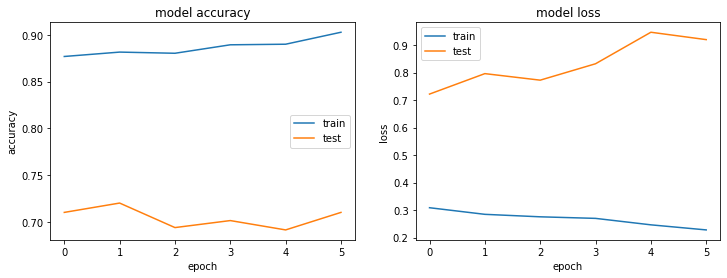

In [74]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history4.history['accuracy'])
plt.plot(cnn_history4.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history4.history['loss'])
plt.plot(cnn_history4.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   

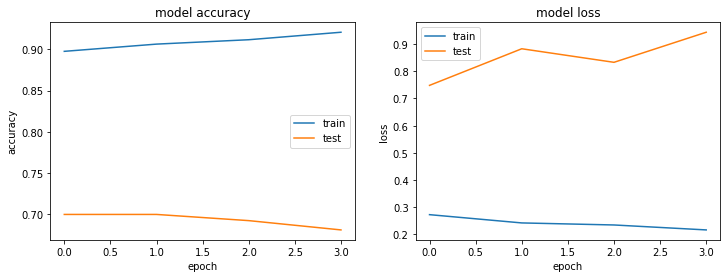

In [75]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history4_2.history['accuracy'])
plt.plot(cnn_history4_2.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history4_2.history['loss'])
plt.plot(cnn_history4_2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   

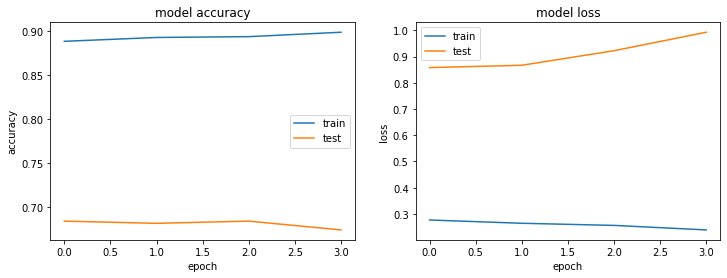

In [76]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history4_3.history['accuracy'])
plt.plot(cnn_history4_3.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(cnn_history4_3.history['loss'])
plt.plot(cnn_history4_3.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])   